In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_DIR = '../'
import sys
sys.path.append(BASE_DIR)

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import tqdm

import torch

from common import climatehack_dataset

In [4]:
# SATELLITE_ZARR_PATH = "gs://public-datasets-eumetsat-solar-forecasting/satellite/EUMETSAT/SEVIRI_RSS/v3/eumetsat_seviri_hrv_uk.zarr"

SATELLITE_ZARR_PATH = '../data/full/eumetsat_seviri_hrv_uk.zarr/'

dataset = xr.open_dataset(
    SATELLITE_ZARR_PATH, 
    engine="zarr",
    chunks="auto",  # Load the data as a Dask array
)

print(dataset)


<xarray.Dataset>
Dimensions:  (time: 173624, y: 891, x: 1843)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:05:00 ... 2021-11-07T15:50:00
  * x        (x) float32 2.8e+04 2.7e+04 2.6e+04 ... -1.813e+06 -1.814e+06
    x_osgb   (y, x) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
  * y        (y) float32 4.198e+06 4.199e+06 4.2e+06 ... 5.087e+06 5.088e+06
    y_osgb   (y, x) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
Data variables:
    data     (time, y, x) int16 dask.array<chunksize=(22, 891, 1843), meta=np.ndarray>


In [15]:
BATCH_SIZE = 1
ds = climatehack_dataset.ClimatehackDataset(dataset, random_state=7)
ch_dataloader = torch.utils.data.DataLoader(
    ds,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=4,
    prefetch_factor=4
)



In [6]:
input_data, target_output = ds[0]

In [7]:
input_data.shape

(12, 128, 128)

In [8]:
target_output.shape

(24, 64, 64)

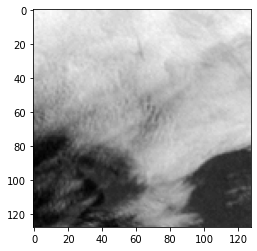

In [9]:
plt.imshow(input_data[0], cmap='gray')

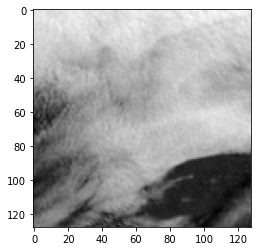

In [10]:
plt.imshow(input_data[-1], cmap='gray')

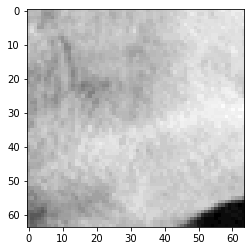

In [11]:
plt.imshow(target_output[0], cmap='gray')

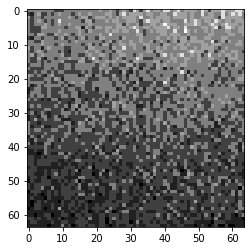

In [12]:
plt.imshow(target_output[-1], cmap='gray')

In [16]:
for i, _ in enumerate(tqdm.tqdm(ch_dataloader)):
    if i > 60:
        break

  0%|                                                                                                                            | 0/676 [04:24<?, ?it/s]


KeyboardInterrupt: 